<a href="https://colab.research.google.com/github/Victor1e/Project_Rumelhart_Romanian/blob/main/AIM_Project_Rumelhart_Verbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Avansat Pregatit: 1560 exemple.
Exemple generate: [('losipa', 'losipat'), ('gemea', 'gemeat'), ('dezafei', 'dezafeit'), ('stii', 'stiut'), ('kula', 'kulat')]


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Antrenament
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.5353 - loss: 2.3687 - val_accuracy: 0.6582 - val_loss: 1.1497
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.6641 - loss: 1.0673 - val_accuracy: 0.6969 - val_loss: 0.9845
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.7043 - loss: 0.9626 - val_accuracy: 0.7130 - val_loss: 0.9362
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.7263 - loss: 0.9043 - val_accuracy: 0.7234 - val_loss: 0.9056
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.7241 - loss: 0.8949 - val_accuracy: 0.7291 - val_loss: 0.8814
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.7377 - loss: 0.8480 - val_accuracy: 0.7418 - val_loss: 0.8328
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.7453 - loss: 0.8253 - val_accuracy: 0.7622 - val_loss: 0.7805
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.7658 - loss: 0.7

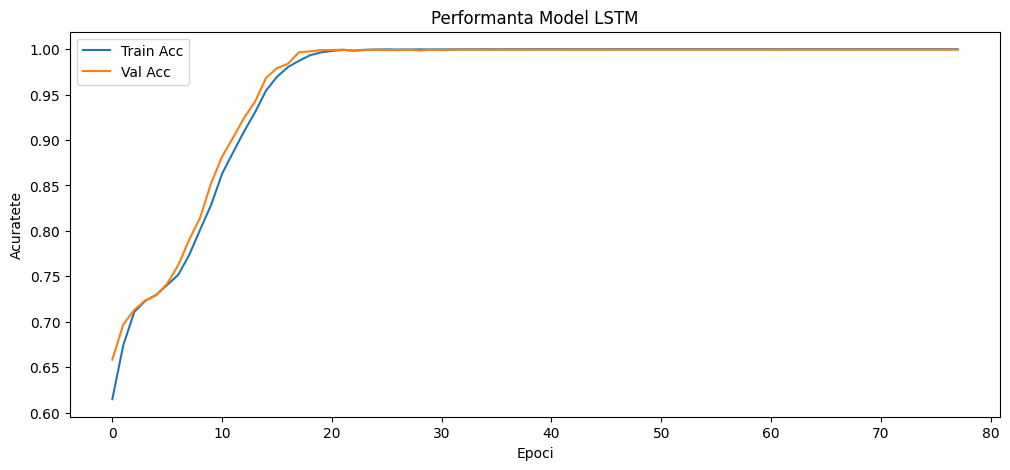


TESTE FINALE
Infinitiv: manca -> Prezicere: mancat
Infinitiv: fi -> Prezicere: fost
Infinitiv: scrie -> Prezicere: scris
Infinitiv: boganiza -> Prezicere: boganizat
Infinitiv: programa -> Prezicere: programat
Infinitiv: cauta -> Prezicere: cautat
Infinitiv: vedea -> Prezicere: vazut


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, TimeDistributed, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random

def genereaza_verbe_regulate(n=1000):
    consoane = list("bcdfghjklmnprstvz")
    vocale = list("aeiou")
    verbe = []

    for _ in range(n):
        lungime = random.randint(3, 6)
        radacina = ""
        for i in range(lungime):
            if i % 2 == 0: radacina += random.choice(consoane)
            else: radacina += random.choice(vocale)

        if random.random() > 0.3:
            infinitiv = radacina + "a"
            trecut = radacina + "at"
        else:
            infinitiv = radacina + "i"
            trecut = radacina + "it"

        verbe.append((infinitiv, trecut))
    return verbe

verbe_reale = [
    ("fi", "fost"), ("avea", "avut"), ("bea", "baut"), ("da", "dat"),
    ("sta", "stat"), ("lua", "luat"), ("vedea", "vazut"), ("vrea", "vrut"),
    ("stii", "stiut"), ("veni", "venit"), ("scrie", "scris"), ("spune", "spus"),
    ("face", "facut"), ("zice", "zis"), ("duce", "dus"), ("rupe", "rupt"),
    ("coace", "copt"), ("fierbe", "fiert"), ("aduce", "adus")
]

dataset = genereaza_verbe_regulate(800) + verbe_reale * 40
random.shuffle(dataset)

print(f"Dataset Avansat Pregatit: {len(dataset)} exemple.")
print(f"Exemple generate: {dataset[:5]}")

all_text = "".join([x[0] + x[1] for x in dataset])
chars = sorted(list(set(all_text)))

char_to_int = {c: i+2 for i, c in enumerate(chars)}
char_to_int['<PAD>'] = 0
char_to_int['<UNK>'] = 1
int_to_char = {i: c for c, i in char_to_int.items()}

vocab_size = len(char_to_int)
max_len = 15

def encode_word(word):
    return [char_to_int.get(c, 1) for c in word]

X = pad_sequences([encode_word(p[0]) for p in dataset], maxlen=max_len, padding='post')
Y = pad_sequences([encode_word(p[1]) for p in dataset], maxlen=max_len, padding='post')

Y_onehot = to_categorical(Y, num_classes=vocab_size)

X_train, X_test, y_train, y_test = train_test_split(X, Y_onehot, test_size=0.1, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("\nAntrenament")
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[callback],
                    verbose=1)

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Performanta Model LSTM')
plt.xlabel('Epoci')
plt.ylabel('Acuratete')
plt.legend()
plt.savefig("grafic_performanta_pro.png")
plt.show()

def predict_verb(word):
    vec = pad_sequences([encode_word(word)], maxlen=max_len, padding='post')
    pred = model.predict(vec, verbose=0)
    res = ""
    for i in range(max_len):
        idx = np.argmax(pred[0][i])
        if idx > 1:
            res += int_to_char[idx]
    return res

print("\nTESTE FINALE")
teste = ["manca", "fi", "scrie", "boganiza", "programa", "cauta", "vedea"]

for t in teste:
    res = predict_verb(t)
    print(f"Infinitiv: {t} -> Prezicere: {res}")